<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW4_woodenML_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 4 (pro): древесные алгоритмы**

### **Постановка задач**

### **Домашнее задание состоит из двух подзадач:**

**1. В  разделе 1 ваша задача:**
-  реализовать свое решающее дерево
- сравнить его со стандартной имплементацией из sklearn

Функции и классы дерева вы должны оформить в модуль `hw4_code_pro.py`.

**2. В разделе два ваша задача:** решить задачу бинарной классификации при помощи написанного Вами дерева, а также леса из sklearn, а после интерпретировать лучшие модели. Чуть точнее

- Извлечь данные из базы данных;
- Предобработать датасет;
- Обучить собственный класс DT, а также RF из `sklearn` в как базовом варианте (гиперпараметры по умолчанию), так и с подбором гиперпараметров;
- Интерпретировать алгоритмы при помощи LIME или SHAP.


### **Оценивание:**

- Как всегда оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.
- Брать код из открытых источников позволительно. Следование культуре цитирования **обязательно.**
- Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.
- Неэффективная реализация кода может негативно отразиться на оценке.

### **Формат сдачи:**
Задания сдаются через  anytask. Посылка должна содержать:
* Ноутбук в формате ipynb
* Модуль hw4_code_pro.py


### **Баллы:**

Суммарно за задание можно получить 10 основных баллов и 1 бонусный балло.

Оценка за ДЗ = min{ваш балл, 10}

Мягкий дедлайн: 27 января 23:59

**Продуктивной и интересной вам работы!**


In [1]:

!pip install optuna
!pip install lime
!pip install shap
!pip install psycopg2-binary


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



^C
^C


In [1]:

import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set(style='whitegrid')

import warnings

warnings.filterwarnings('ignore')

# **1. Решающие деревья своими руками (6 баллов)**

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

Всего за часть вы можете получить 6 основных баллов и 1 бонусный.

### **Задание 1. (1 балл)**

Реализуйте функцию find_best_split из модуля hw4_code_pro.py

$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

In [3]:
# Заполните код в модуле

### **Задание 2. (0.25 балла)**

Загрузите таблицу [students.csv](https://github.com/AnastasiyaMax/MLDS_ml_course_fall21/blob/main/hw/hw5_trees/students.csv). Это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling).

В наборе данных:
- признаки объекта записаны в первых пяти столбцах;
- в последнем записана целевая переменная (класс: 0 или 1).

По этим данным, используя функцию из задания 1, постройте:
- пять кривых "порог — значение критерия Джини" для всех пяти признаков;
- scatter-графики "значение признака — класс" для всех пяти признаков;

In [2]:
import pandas as pd
from hw4_code_pro import find_best_split, DecisionTree

df = pd.read_csv('students.csv')
features = df.iloc[:, :-1]
target = df.iloc[:, -1]

gini_data = {}
for column in features.columns:
    thresholds, ginis, _, _ = find_best_split(features[column].values, target.values)
    gini_data[column] = (thresholds, ginis)

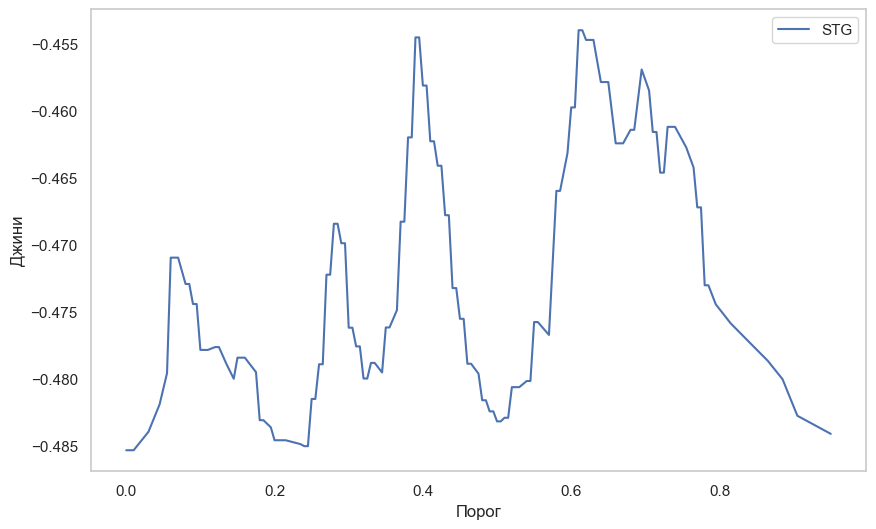

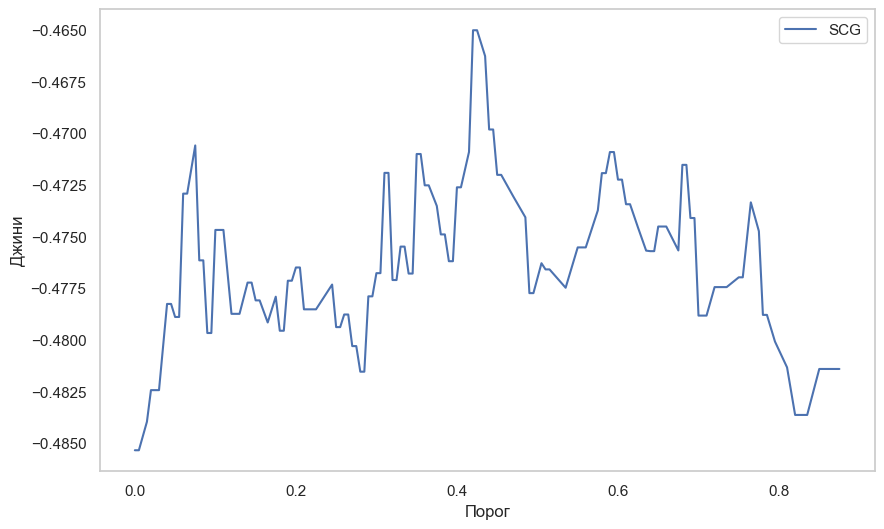

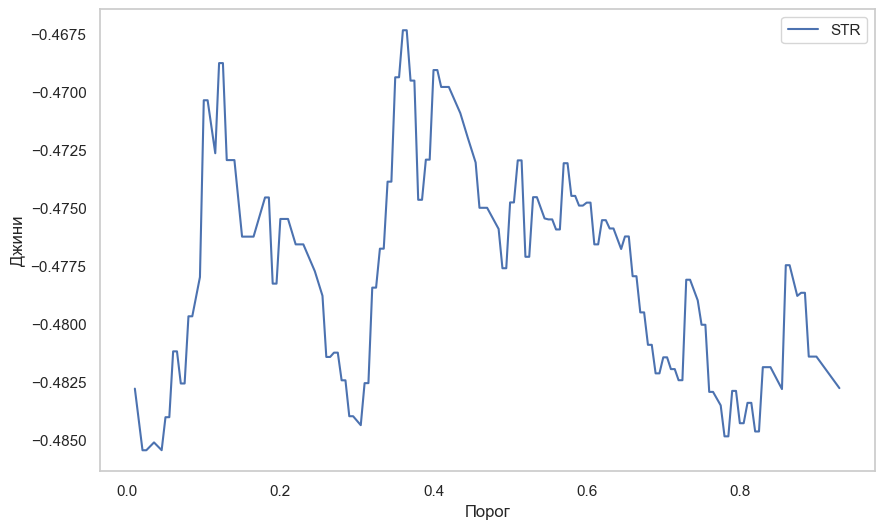

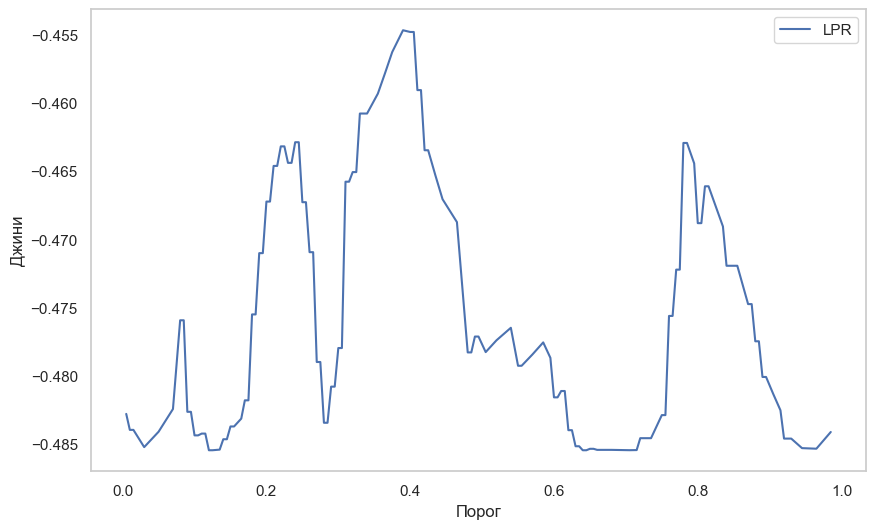

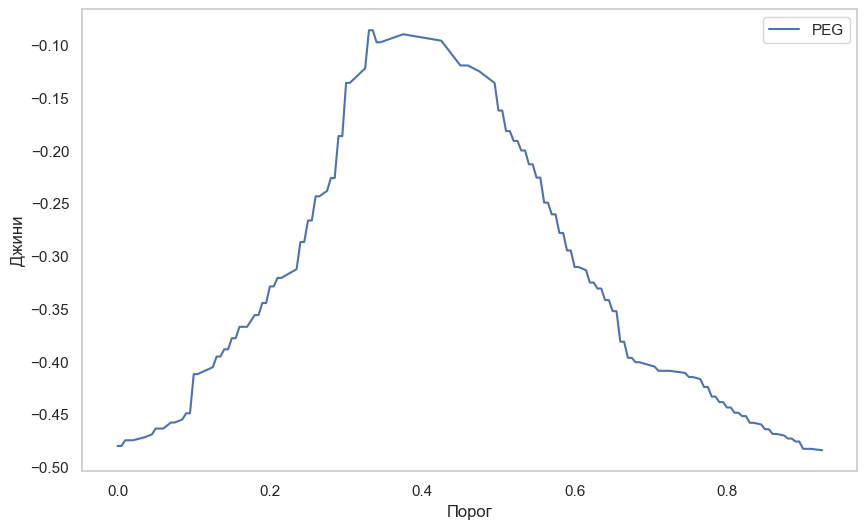

In [5]:
from matplotlib import pyplot as plt

for feature, (thresholds, ginis) in gini_data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, ginis, label=feature)
    plt.xlabel('Порог')
    plt.ylabel('Джини')
    plt.legend()
    plt.grid()
    plt.show()

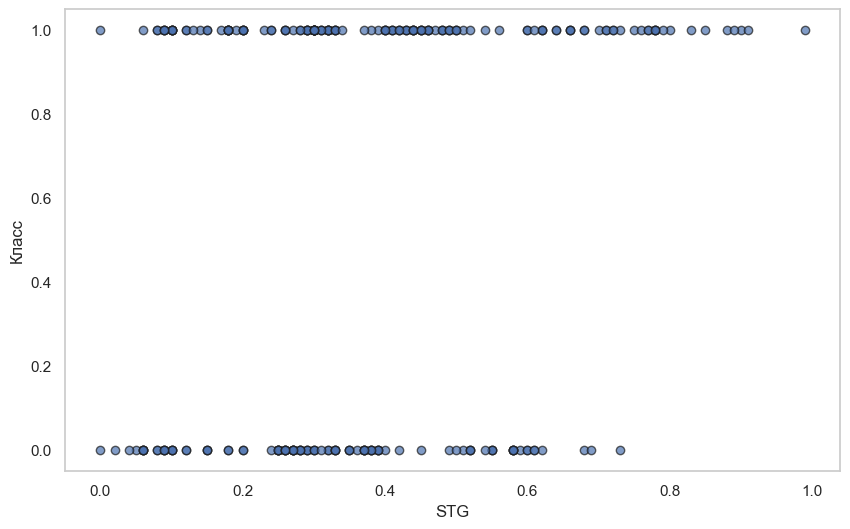

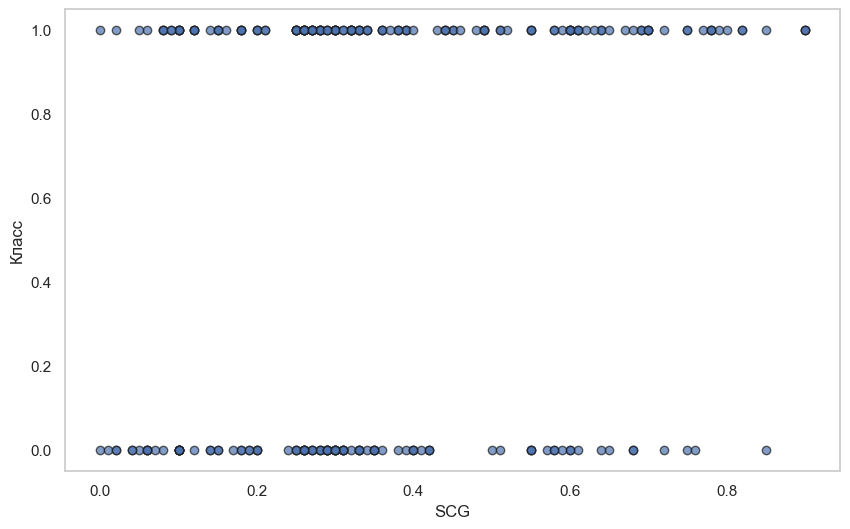

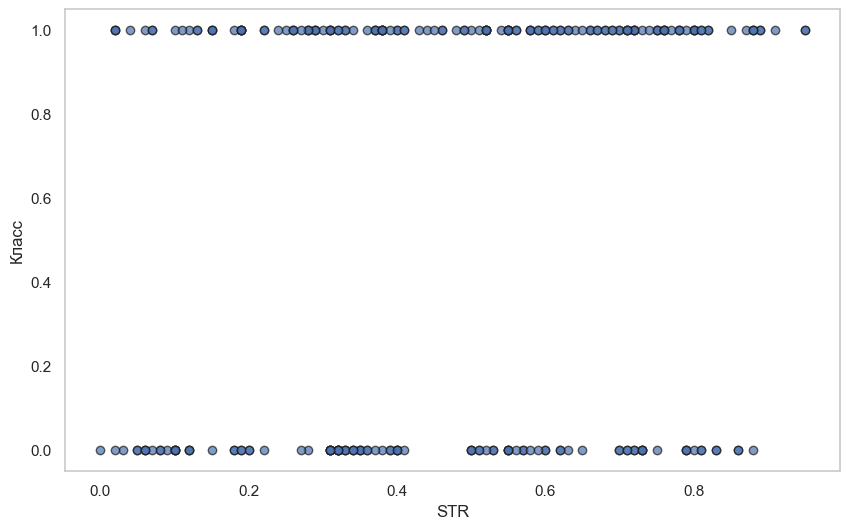

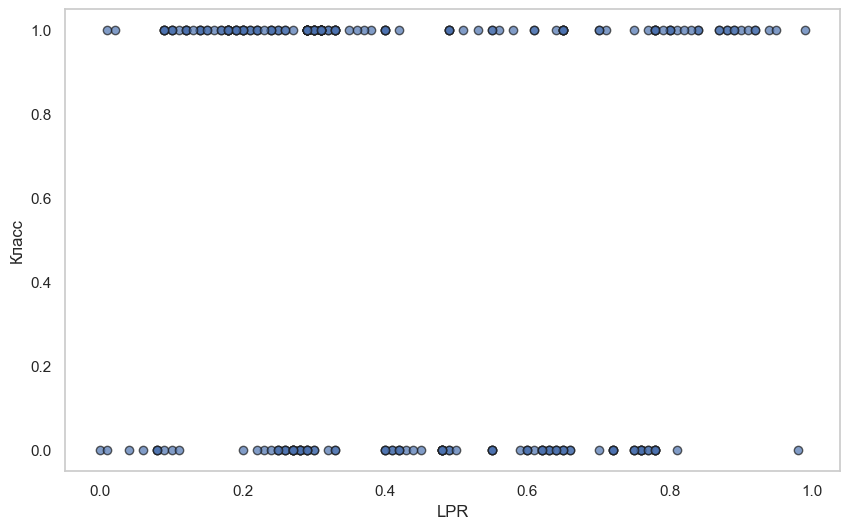

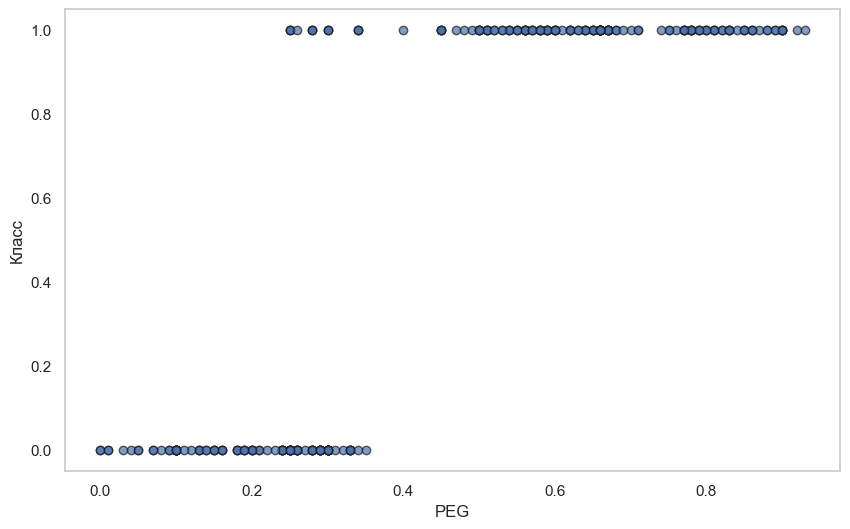

In [7]:
for column in features.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(features[column], target, alpha=0.7, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel('Класс')
    plt.grid()
    plt.show()

### **Задание 3. (0.6 балла)**

Проанализируйтте построенные кривые. Ответьте на поставленные вопросы:
- По какому признаку нужно производить деление выборки на два поддерева? (0.15 балла)
- Согласуется ли этот результат с визуальной оценкой scatter-графиков? (0.15 балла)
- Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? (0.15 балла)
- Чем отличаются кривые для признаков, по которым деление практически невозможно? (0.15 балла)

**Ответ:**
1. Лучше делить выборку по PEG, так как по этому признаку коэф-т Джини самый высокий, а у нас как раз задача максимизации: $Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$
2. Да, на scatter-плоте видно хорошую разделимость классов
3. В нашем случае идеальной кривой будет функция с максимумом в 0, и схожестью с перевернутым графиком параболы
4. Кривые имеют колебания, нет четко выржаенного максимума

### **Задание 4. (1.15 балла)**

В некоторых случаях необходимо анализировать код исполненного класса на предмет оптимальности и ошибок. Потренируйтесь в этом!

- Разберитесь с уже написанным кодом в классе DecisionTree модуля hw4_code_pro.py.
- Найдите ошибки в реализации метода \_fit_node.
- Напишите функцию \_predict_node.

**Примечание 1:**

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева».
- Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

**Примечание 2:**

- Выбор лучшего разбиения необходимо производить по критерию Джини.
- Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку, чтобы Джини упал
- Ответ в листе: наиболее часто встречающийся класс в листе.


1. `elif feature_type == "categorical"` - была опечатка `Categorical`
2. `if np.all(sub_y == sub_y[0]):` - если все одного класса, то выходим из ф-ии
3. `for feature in range(sub_X.shape[1]):` - ходим с начала, а не с 1 элемента
4. `if gini_best is None or gini < gini_best` - минимизируем
5. `node["class"] = Counter(sub_y).most_common(1)[0][0]` - берём 1 эл-т из кортежа
6. `np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))` - map возвращает итератор, поэтому обернул в list
7. `ratio[key] = current_count / current_click` - была возможность деления на 0 в этой строке

### **Задание 5. (0.5 балла)**

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Для этого:

- Скачайте таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/))
- Прочитайте данные с помощью pandas
- Примените к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа.
- Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные)
- Сделайте предсказания для оставшейся половины.
- Вычислите accuracy (так как мы используем эту метрику и в силу задачи, нам не очень важно, что будет классом 1, а что — классом 0).  


У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv('agaricus-lepiota.data')

encoder = LabelEncoder()
df = df.apply(encoder.fit_transform)

df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [8]:
from sklearn.metrics import accuracy_score

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=True)
tree = DecisionTree(feature_types=["categorical"] * X.shape[1])
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)
accuracy_score(y_val, y_pred)

0.5196947316592812

### **Задание 6. (бонус, 1 балл)**

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующее задание).

### **Задание 7. (2 балла)**

**1. Загрузите следующие наборы данных** (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (они записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**2. Закодируйте категориальные признаки, использовав LabelEncoder.** С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации:**
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами.

In [4]:
df_mushrooms = pd.read_csv('agaricus-lepiota.data')
# df_ttt = pd.read_csv('.data') 404 по ссылке из ноутбука
df_cars = pd.read_csv('car.data')
df_nursery = pd.read_csv('nursery.data')

# классы в нулевом столбце
X_mushrooms = df_mushrooms.iloc[:, 1:]
y_mushrooms = df_mushrooms.iloc[:, 0]

# классы в последнем столбце
X_cars = df_cars.iloc[:, :-1]
y_cars = df_cars.iloc[:, -1]
y_cars = y_cars.apply(lambda x: 0 if x in ['unacc', 'acc'] else 1)

# классы в последнем столбце
X_nursery = df_nursery.iloc[:, :-1]
y_nursery = df_nursery.iloc[:, -1]
y_nursery = y_nursery.apply(lambda x: 0 if x in ['not_recom', 'recommend'] else 1)

In [14]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

datasets = {
    "mushrooms": (X_mushrooms, y_mushrooms),
    "cars": (X_cars, y_cars),
    "nursery": (X_nursery, y_nursery)
}


def encode_categorical(df):
    encoder = LabelEncoder()
    return df.apply(encoder.fit_transform)


def one_hot_encode(df):
    encoder = OneHotEncoder(sparse_output=False)
    return encoder.fit_transform(df)


results = []
for name, (X, y) in datasets.items():
    X_encoded = encode_categorical(X)
    y_encoded = encode_categorical(y.to_frame()).values.flatten()

    X_one_hot = one_hot_encode(X)

    scores = {}

    # 1. DecisionTree, все признаки вещественными
    tree_real = DecisionTree(feature_types=["real"] * X_encoded.shape[1], max_depth=30)
    scores["Real Features"] = np.mean(
        cross_val_score(tree_real, X_encoded.values, y_encoded, cv=10, scoring=make_scorer(accuracy_score)))

    # 2. DecisionTree, все признаки категориальными
    tree_categorical = DecisionTree(feature_types=["categorical"] * X_encoded.shape[1], max_depth=30)
    scores["Categorical Features"] = np.mean(
        cross_val_score(tree_categorical, X_encoded.values, y_encoded, cv=10, scoring=make_scorer(accuracy_score)))

    # 3. DecisionTree, все признаки вещественными + one-hot-encoding
    tree_one_hot = DecisionTree(feature_types=["real"] * X_one_hot.shape[1], max_depth=30)
    scores["One-Hot Encoding"] = np.mean(
        cross_val_score(tree_one_hot, X_one_hot, y_encoded, cv=10, scoring=make_scorer(accuracy_score)))

    # # 4. DecisionTreeClassifier
    tree_sklearn = DecisionTreeClassifier()
    scores["DecisionTreeClassifier"] = np.mean(
        cross_val_score(tree_sklearn, X_encoded.values, y_encoded, cv=10, scoring=make_scorer(accuracy_score)))

    results.append([name] + list(scores.values()))

columns = ["Dataset",
           "Real Features",
           "Categorical Features",
           "One-Hot Encoding",
           "DecisionTreeClassifier"
           ]
results_df = pd.DataFrame(results, columns=columns)

print(results_df)

     Dataset  Real Features  Categorical Features  One-Hot Encoding  \
0  mushrooms       0.464636              0.464636          0.210675   
1       cars       0.922154              0.922154          0.922154   
2    nursery       0.599820              0.599820          0.666564   

   DecisionTreeClassifier  
0                0.958290  
1                0.944952  
2                0.999846  


### **Задание 8. (0.5 балла)**

Проанализируйте результаты эксперимента. Ответьте на вопросы:
- Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.
- Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
- Если случайность есть, то можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
1. Для cars алгоритмы ранжируются одинаково. В mushrooms OHE создаёёт слишком много признаков, поэтому качество алгоритма падает.
2. Не очень понял как связана случайность в результатах и значения признаков.
3. Случайность есть в cv, если речь про это, можно зафиксировать в random_state

# **2. Задача бинарной классификации реализованным деревом (4 балла)**

Всего за эту часть можно получить 4 балла.

В этом разделе вам необходимо решить задачу бинарной классификации самописным деревом и лесом из sklearn, а после интерпретировать лучшие модели. А именно:

- Извлечь данные из базы данных;
- Предобработать датасет;
- Обучить собственный класс DT и RF из `sklearn` в как базовом варианте (гиперпараметры по умолчанию), так и с подбором гиперпараметров;
- Интерпретировать алгоритмы при помощи LIME или SHAP.


### **Познакомимся с задачей: постановка**

У вас есть данные о полетах, обладающие следущими характеристиками:
- Для **каждого** клиента известна краткая информация о самом человеке, о типе билета и о рейсе, а также оценки клиента различным аспектам полета.
- Для **некоторых** клиентов известна их удовлетворенность полетом (satisfied или neutral or dissatisfied).

По данным необходимо обучить модель, предсказывающую удовлетворенность клиентов полетом. Итоговые предсказания нужно сделать для клиентов, **для которых ответ неизвестен.**

### **Получение данных:**

Компания держит все данные в облаке Яндекса в Postgresql. Данные разбиты на смысловые таблицы. Чтобы получить данные, вам необходимо подключиться к базе данных и добыть оттуда данные.

In [19]:
!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/.postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

The syntax of the command is incorrect.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


### **Задание 9. Получение данных (0.5 балла)**

- Подключитесь к БД при помощи `psycopg2.connect()`
- Напишите SQL-запрос, объединяющий 3 нужные таблицы в одну
- Результат запроса поместите в `pd.DataFrame`. Индексом получившегося датафрейма сделайте столбец 'id'.

Список столбцов таблиц добудьте самостоятельно.


**Примечание:**
 Не забудьте закрыть соединение. Или открывайте соединение, используя менеджер контекста `with as`, который закроет его автоматически

##### **Параметры соединения:**
```
host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
port=6432
sslmode=verify-full
dbname=db_flights
user=mlhs_student
password=mlhs_student
target_session_attrs=read-write```
```

##### **Схема БД**

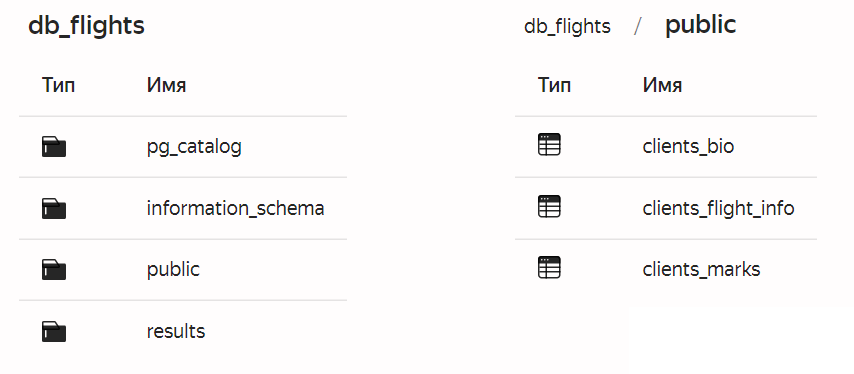

In [ ]:
# Ваш код здесь

In [ ]:
assert df.shape == (129_549, 23)

Разобьем датасет на тренировочную и тестовую части. Тестовую часть отложим надолго -- до самого конца этого ноутбука.

In [ ]:
df_train = df[df.satisfaction != '-']

df_train.head()

In [ ]:
assert df_train.shape == (103_644, 23)

In [ ]:
df_test = df[df.satisfaction == '-'].drop('satisfaction', axis=1)
df_test.head()

In [ ]:
assert df_test.shape == (25_905, 22)

Разбиваем данные на трейн и валидацию. Не меняйте сид.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop('satisfaction', axis=1), df_train.satisfaction,
                                                  test_size=0.3, random_state=42)

In [ ]:
assert X_train.shape == (72_550, 22)
assert X_val.shape == (31_094, 22)

### **Задание 10 (0.25 балла)**

- Преобразуйте числовые столбцы в `float`. Проверьте, есть ли в датафрейме пропуски и выбросы (в том числе в категориальных признаках)
- Заполните пропуски в данных наиболее часто встречающимся значением.
Помните про правильность заполнения.
- Выведите основные статистики по числовым и категориальным столбцам таблицы
- Сделайте **текстовый** вывод о распределениях значений признаков

In [ ]:
# Ваш код здесь

`Ваш ответ здесь`

### **Задание 11. (2 балла)**

Осуществите предобработку датасета для обучения **полностью самостоятельно**, на основе вашего опыта из прошлых дз и изученной теории. Обязательно **комментируйте** каждое действие.

**Примечание:**

В данном задании ваша задача в том числе убедить ревьюера в достаточности предобработки.

In [ ]:
# Ваш код здесь

### **Задание 12. (0.25 балла)**

- Обучите самописное дерево и Random Forest с базовыми гиперпараметрами. Выведите `f1-score`.

In [ ]:
# Ваш код здесь

### **Задание 13. (0.4 баллa)**

- Попробуйте подобрать оптимальные гиперпараметры леса и дерева (если реализовали их в бонусе), используя [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).
- Сравните качество полученных моделей и выберите лучшую. Лучшую модель сохраните в pickle.

**Важно:**  

Хотя бы один из гиперпараметров перебирайте из распределения (например, `uniform` из `scipy.stats`)

In [ ]:
# Ваш код здесь

### **Задание 14. Анализ моделей (0.1 балла)**

- Отобразите`feature_importances_` вашего лучшего случайного леса;
- Проанализируйте, какие признаки оказались важными?

In [ ]:
# Ваш код здесь

`Ваш ответ здесь. `

### **Задание 15. (0.25 балла)**
- Интерпретируйте важности признаков с помощью SHAP.
- Опишите полученый график

**Важно:** Для подсчета используйте 1000 случайных объектов, иначе не дождетесь за приемлемое время

**Вам может помочь:** [Статья "Интерпретация моделей и диагностика сдвига данных: LIME, SHAP и Shapley Flow"](https://habr.com/ru/company/ods/blog/599573/) из блога ods.ai на Хабре

In [ ]:
# Ваш код здесь

`Ваш ответ здесь. `

### **Задание 16. (0.25 балла)**

- Интерпретируйте важности признаков для одного прогноза с помощью LIME;
- Опишите полученный график для выбранного наблюдения

In [ ]:
# Ваш код здесь

`Ваш ответ здесь. `

## Котобонус!

0.25 балла

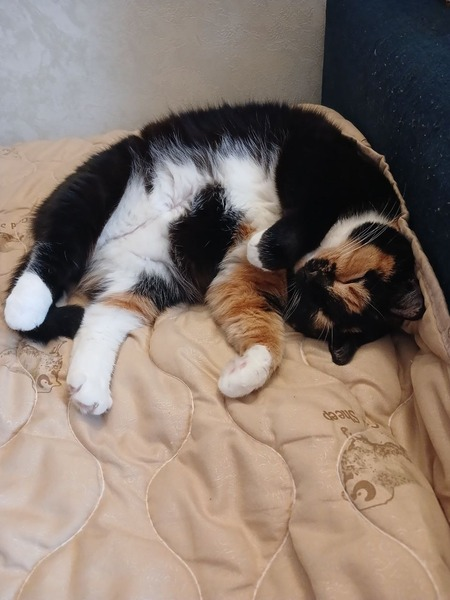

# Обратная связь

Расскажите, как вам это домашнее задание. Было ли оно полезным? Научились ли вы чему то? Насколько сложным по 10-балльной шкале оно вам показалось? Сколько времени у вас ушло на его выполнение? Что следовало ещё в него включить? Было ли что-то лишнее?